# Using FastAI library

In [ ]:
from fastbook import *  # FastAI
from IPython.display import Image

---

untar_data - downloads dataset (if not already downloaded) and untars it (if not already untarned). Returns path



In [ ]:
path = untar_data(URLs.MNIST)
Path.BASE_PATH = path  # sets the root of path to the dataset
path.ls()
print(path)

---

DataBlock is high API to quickly build dataloaders. 

Dataloaders is just a list that contains batches and labels
> [((training1, training2, ..., trainingBATCH_SIZE), (label1, label2, ..., labelBATCH_SIZE)),
((trainingBATCH_SIZE+1, ..., training2*BATCH_SIZE), (labelBATCH_SIZE+1, ..., label2*BATCH_SIZE)), ...]

- blocks argument provides info about input and output. In our example ImageBlock is input and Category Block is a output.

- get_items - how to get input, get_image_files returns file names in path

- splitter - how to split data. We use Random split; 20% for validation and rest for training set.

- get_y - how to get label, here we say that label is a name of directory that file is in

- batch_tfms - how to augment data, aug_transforms zooms, crops, changes brightness, rotates.
            We specified not to do flip, because we don't want 6 to become 9.
            
- item_tfms - how to transform input, here we Resize to 28x28 picture.





In [99]:
block = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label,
        batch_tfms=aug_transforms(do_flip=False),
        item_tfms = Resize(28))

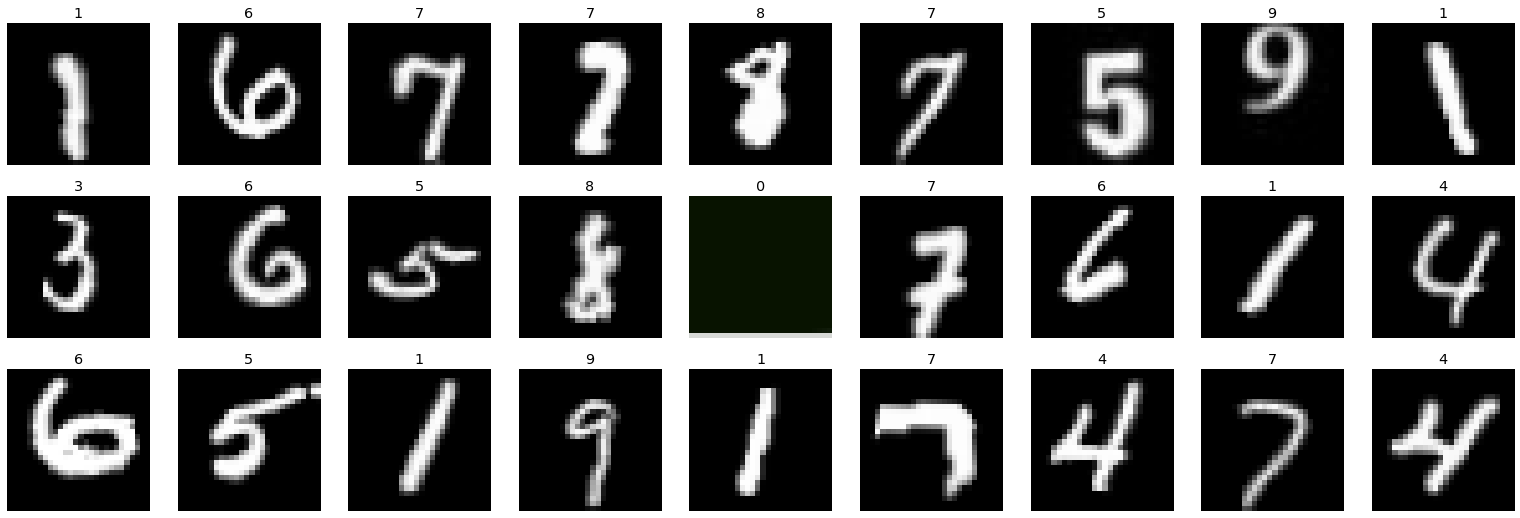

In [100]:
loaders = block.dataloaders("mnist_png/training")
loaders.train.show_batch(max_n=27, nrows=3)

 ---
 - resnet18 is a deep residual network pre-trained on ImageNet
 

In [101]:
learn = cnn_learner(loaders, resnet18, metrics=accuracy)

---
- suggested learning rate

SuggestedLRs(valley=0.0020892962347716093)

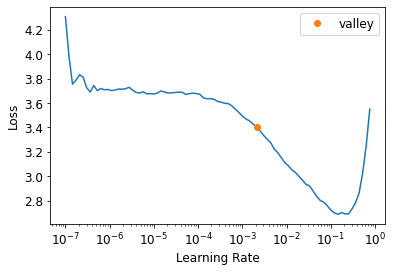

In [102]:
learn.lr_find()

--- 
learn fine tune trains an neural network.

1. As defualt it first train only the last layer for 1 epoch, other are freezed
2. Then it unfreezes all layers and trains the first layers with a learning rate that is like a gradient. Deeper layers have much higher learning rate than the first layers. Because the first layers learn general things such as corners, lines etc. We want to adjust as much the deepest layers but keep 

epoch,train_loss,valid_loss,accuracy,time
0,0.978201,0.752614,0.749552,01:06


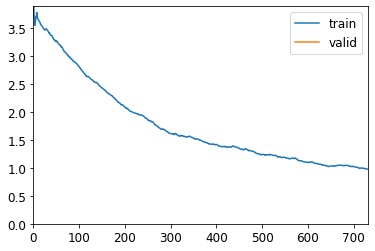

epoch,train_loss,valid_loss,accuracy,time
0,0.211373,0.141145,0.955512,01:12
1,0.139799,0.097612,0.970455,01:12
2,0.087344,0.053852,0.983691,01:12
3,0.053170,0.043149,0.986935,01:12
4,0.044238,0.042311,0.987277,01:12


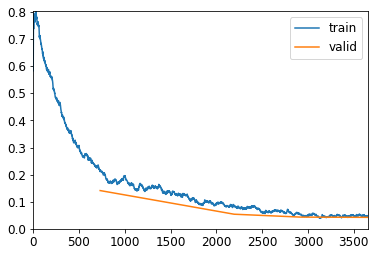

In [103]:
learn.fine_tune(5, base_lr=0.002, cbs=[ShowGraphCallback()])

In [104]:
learn.export(os.path.abspath('./nn_blank_images.pkl'))

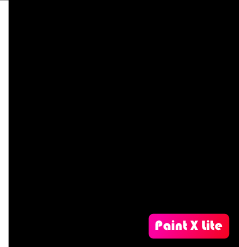

In [105]:
Image(filename='test1.png') 

In [106]:
learn.predict("test1.png")

('0',
 tensor(0),
 tensor([1.0000e+00, 4.3466e-31, 4.5482e-25, 4.0592e-31, 1.2997e-18, 2.0171e-34, 3.7570e-23, 2.6698e-35, 1.9752e-30, 2.4567e-27]))

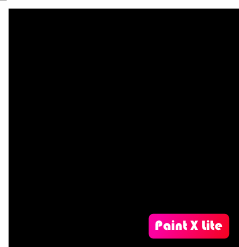

In [86]:
Image(filename='test2.png') 

In [87]:
learn.predict("test2.png")

('0',
 tensor(0),
 tensor([9.9998e-01, 3.5959e-06, 5.0086e-07, 2.2122e-06, 1.3377e-06, 6.2746e-06, 9.5571e-07, 2.2542e-06, 1.4336e-06, 2.6484e-07]))

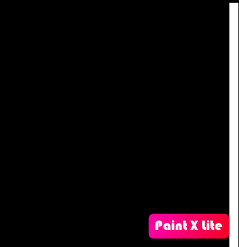

In [88]:
Image(filename='tes3.png') 

In [89]:
learn.predict("tes3.png")

('0',
 tensor(0),
 tensor([9.9999e-01, 1.6320e-06, 2.9711e-07, 1.2616e-06, 7.3814e-07, 3.7115e-06, 4.9688e-07, 1.4187e-06, 8.7750e-07, 1.3778e-07]))

In [74]:
Image(filename='mnist_png/training/1/10006.png') 

In [75]:
learn.predict("mnist_png/training/1/10006.png")

('1',
 tensor(1),
 tensor([7.2571e-08, 9.9998e-01, 3.1768e-06, 1.7241e-07, 1.0797e-05, 1.5597e-07, 9.0959e-07, 1.5914e-06, 1.1908e-07, 1.6152e-07]))